<a href="https://colab.research.google.com/github/qnhhoa/DataminingLab4/blob/main/Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LAB 4 BÀI 5

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [ ]:
# Kết nối tới Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
SAVING_PATH = '/content/drive/MyDrive/Colab Notebooks/DataMining'

In [ ]:
import os
dataset = os.path.join(SAVING_PATH, 'heart.csv')
df = pd.read_csv(dataset)

In [ ]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Xử lý dữ liệu

In [ ]:
total = df.isnull().sum().sort_values(ascending=False)
percent_1=df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1,1)).sort_values(ascending = False)
missing_data = pd.concat([total,percent_2],axis=1,keys=['Total','%'])
missing_data.head(5)

,Total,%
age,0,0.0
sex,0,0.0
cp,0,0.0
trestbps,0,0.0
chol,0,0.0


Không có dữ liệu trống. 
Đổi tên thuộc tính

In [ ]:
df.columns = ['age','sex','chest_pain_type','resting_blood_pressure','cholesterol','fasting_blood_sugar','rest_ecg','max_heart_rate_achieved','exercise_induced_angina','st_depression','st_slope','num_major_vessels','thalassemia','target']


Khảo sát độ tương đồng của các thuộc tính, độ tương đồng cao thì loại bỏ

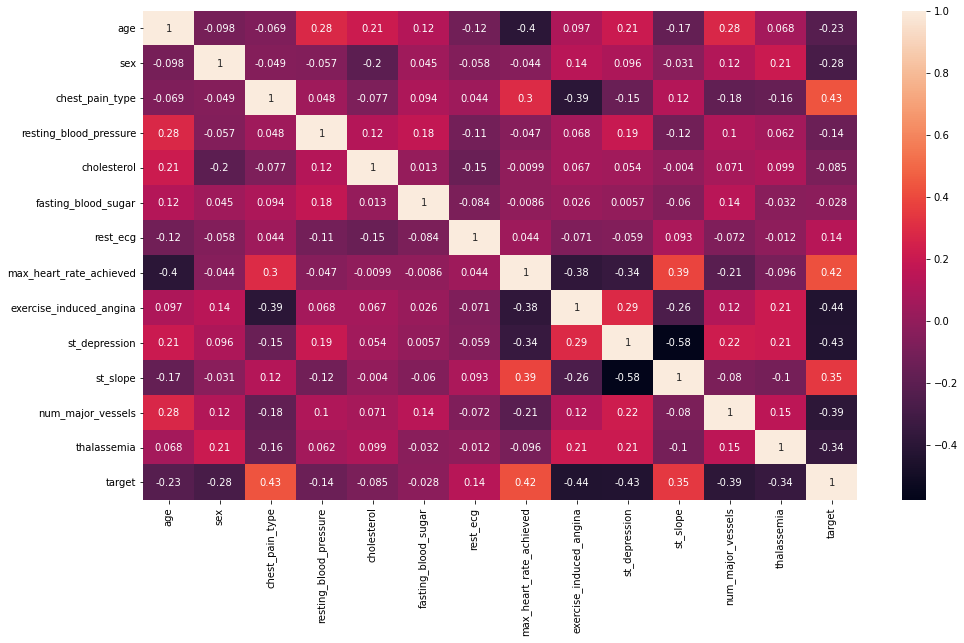

In [ ]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(method='pearson'),annot=True)

Mức độ tương đồng thấp nên không cần thiết loại bỏ thuộc tính 

Tách dữ liệu thành input và output. Sau đó chia thành tập train và test

In [ ]:
feature = df.drop('target',axis=1)
label = df['target']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(feature,label,test_size=0.3,random_state=42)

THUẬT TOÁN ID3

In [ ]:
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=0)
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
tree_pred = clf.predict(x_test)

tree_score = metrics.accuracy_score(y_test,tree_pred)
print("Accuracy:",tree_score)
print("Report:",metrics.classification_report(y_test,tree_pred))

Accuracy: 0.7252747252747253
Report:               precision    recall  f1-score   support

           0       0.67      0.76      0.71        41
           1       0.78      0.70      0.74        50

    accuracy                           0.73        91
   macro avg       0.73      0.73      0.72        91
weighted avg       0.73      0.73      0.73        91



Tính ma trận nhầm lẫn

In [ ]:
tree_cm = metrics.confusion_matrix(y_test,tree_pred)

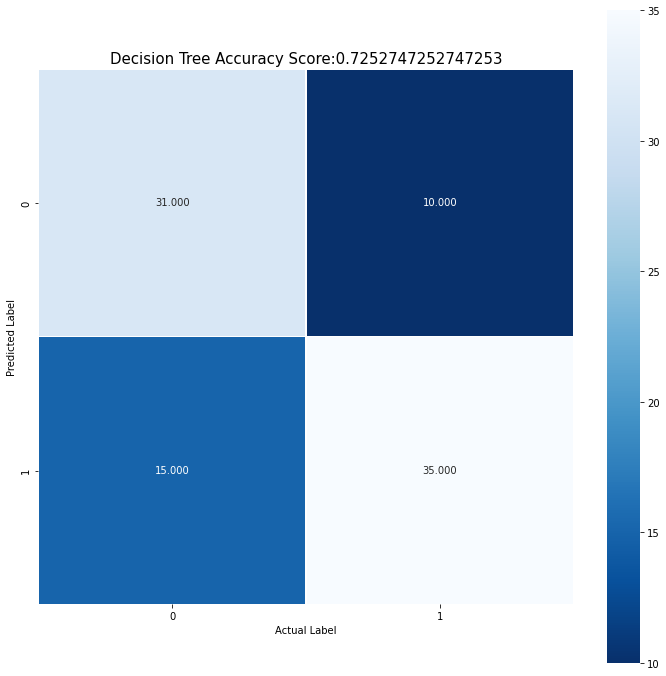

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(tree_cm,annot=True, fmt=".3f",linewidth=.5,square=True,cmap='Blues_r');
plt.xlabel('Actual Label');
plt.ylabel('Predicted Label');
title ='Decision Tree Accuracy Score:{0}'.format(tree_score)
plt.title(title,size=15);

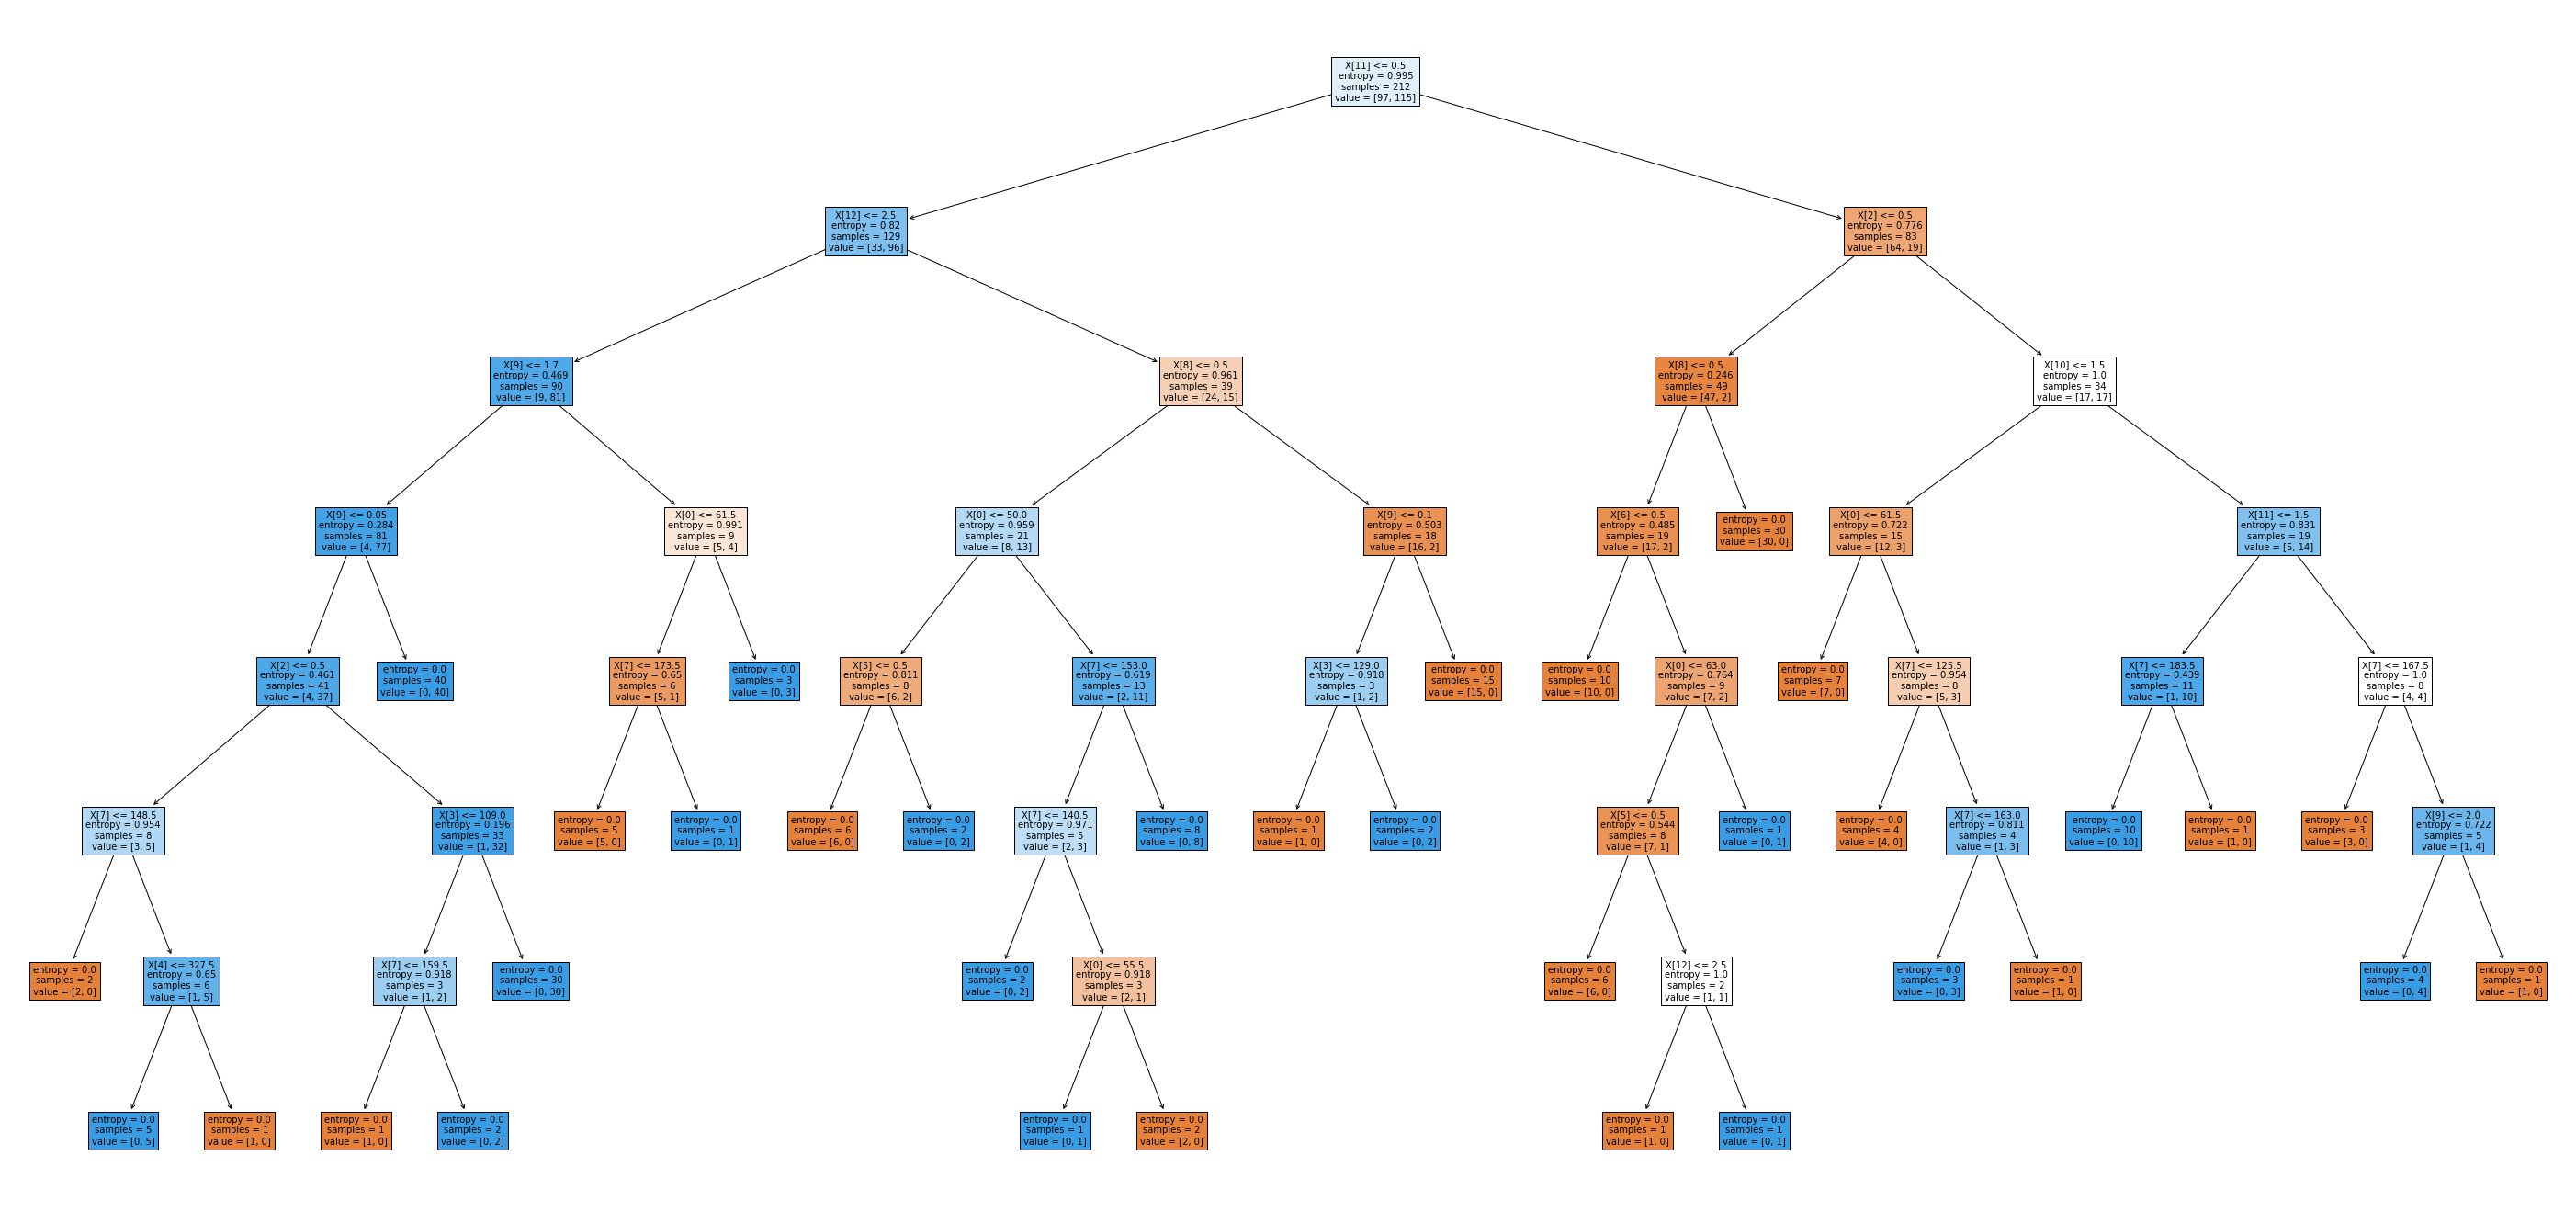

In [ ]:
fig, ax = plt.subplots(figsize=(50,24))
tree.plot_tree(clf,filled=True,fontsize=10)
plt.savefig('decision_tree',dpi=100)
plt.show()

THUẬT TOÁN CART 

In [ ]:
clf2 = tree.DecisionTreeClassifier(criterion="gini",random_state=0)
clf2.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
tree_pred = clf2.predict(x_test)

tree_score = metrics.accuracy_score(y_test,tree_pred)
print("Accuracy:",tree_score)
print("Report:",metrics.classification_report(y_test,tree_pred))

Accuracy: 0.7252747252747253
Report:               precision    recall  f1-score   support

           0       0.67      0.76      0.71        41
           1       0.78      0.70      0.74        50

    accuracy                           0.73        91
   macro avg       0.73      0.73      0.72        91
weighted avg       0.73      0.73      0.73        91



In [ ]:
tree_cm = metrics.confusion_matrix(y_test,tree_pred)

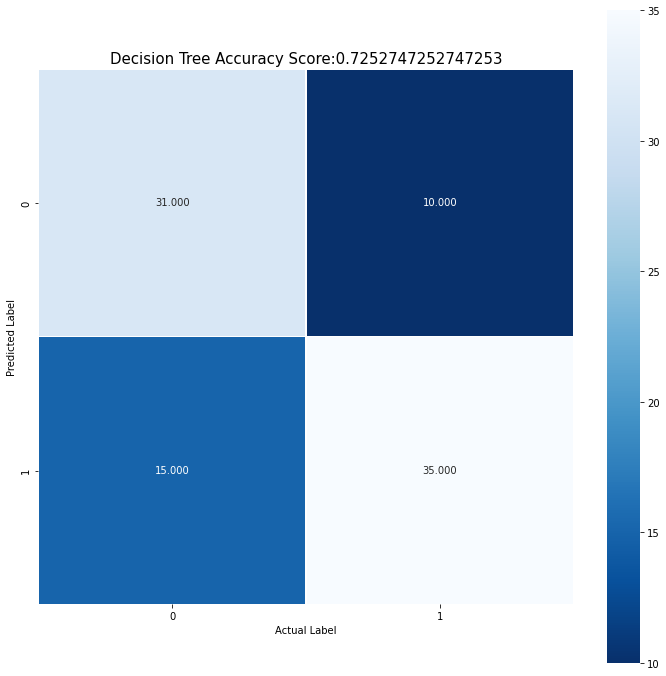

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(tree_cm,annot=True, fmt=".3f",linewidth=.5,square=True,cmap='Blues_r');
plt.xlabel('Actual Label');
plt.ylabel('Predicted Label');
title ='Decision Tree Accuracy Score:{0}'.format(tree_score)
plt.title(title,size=15);

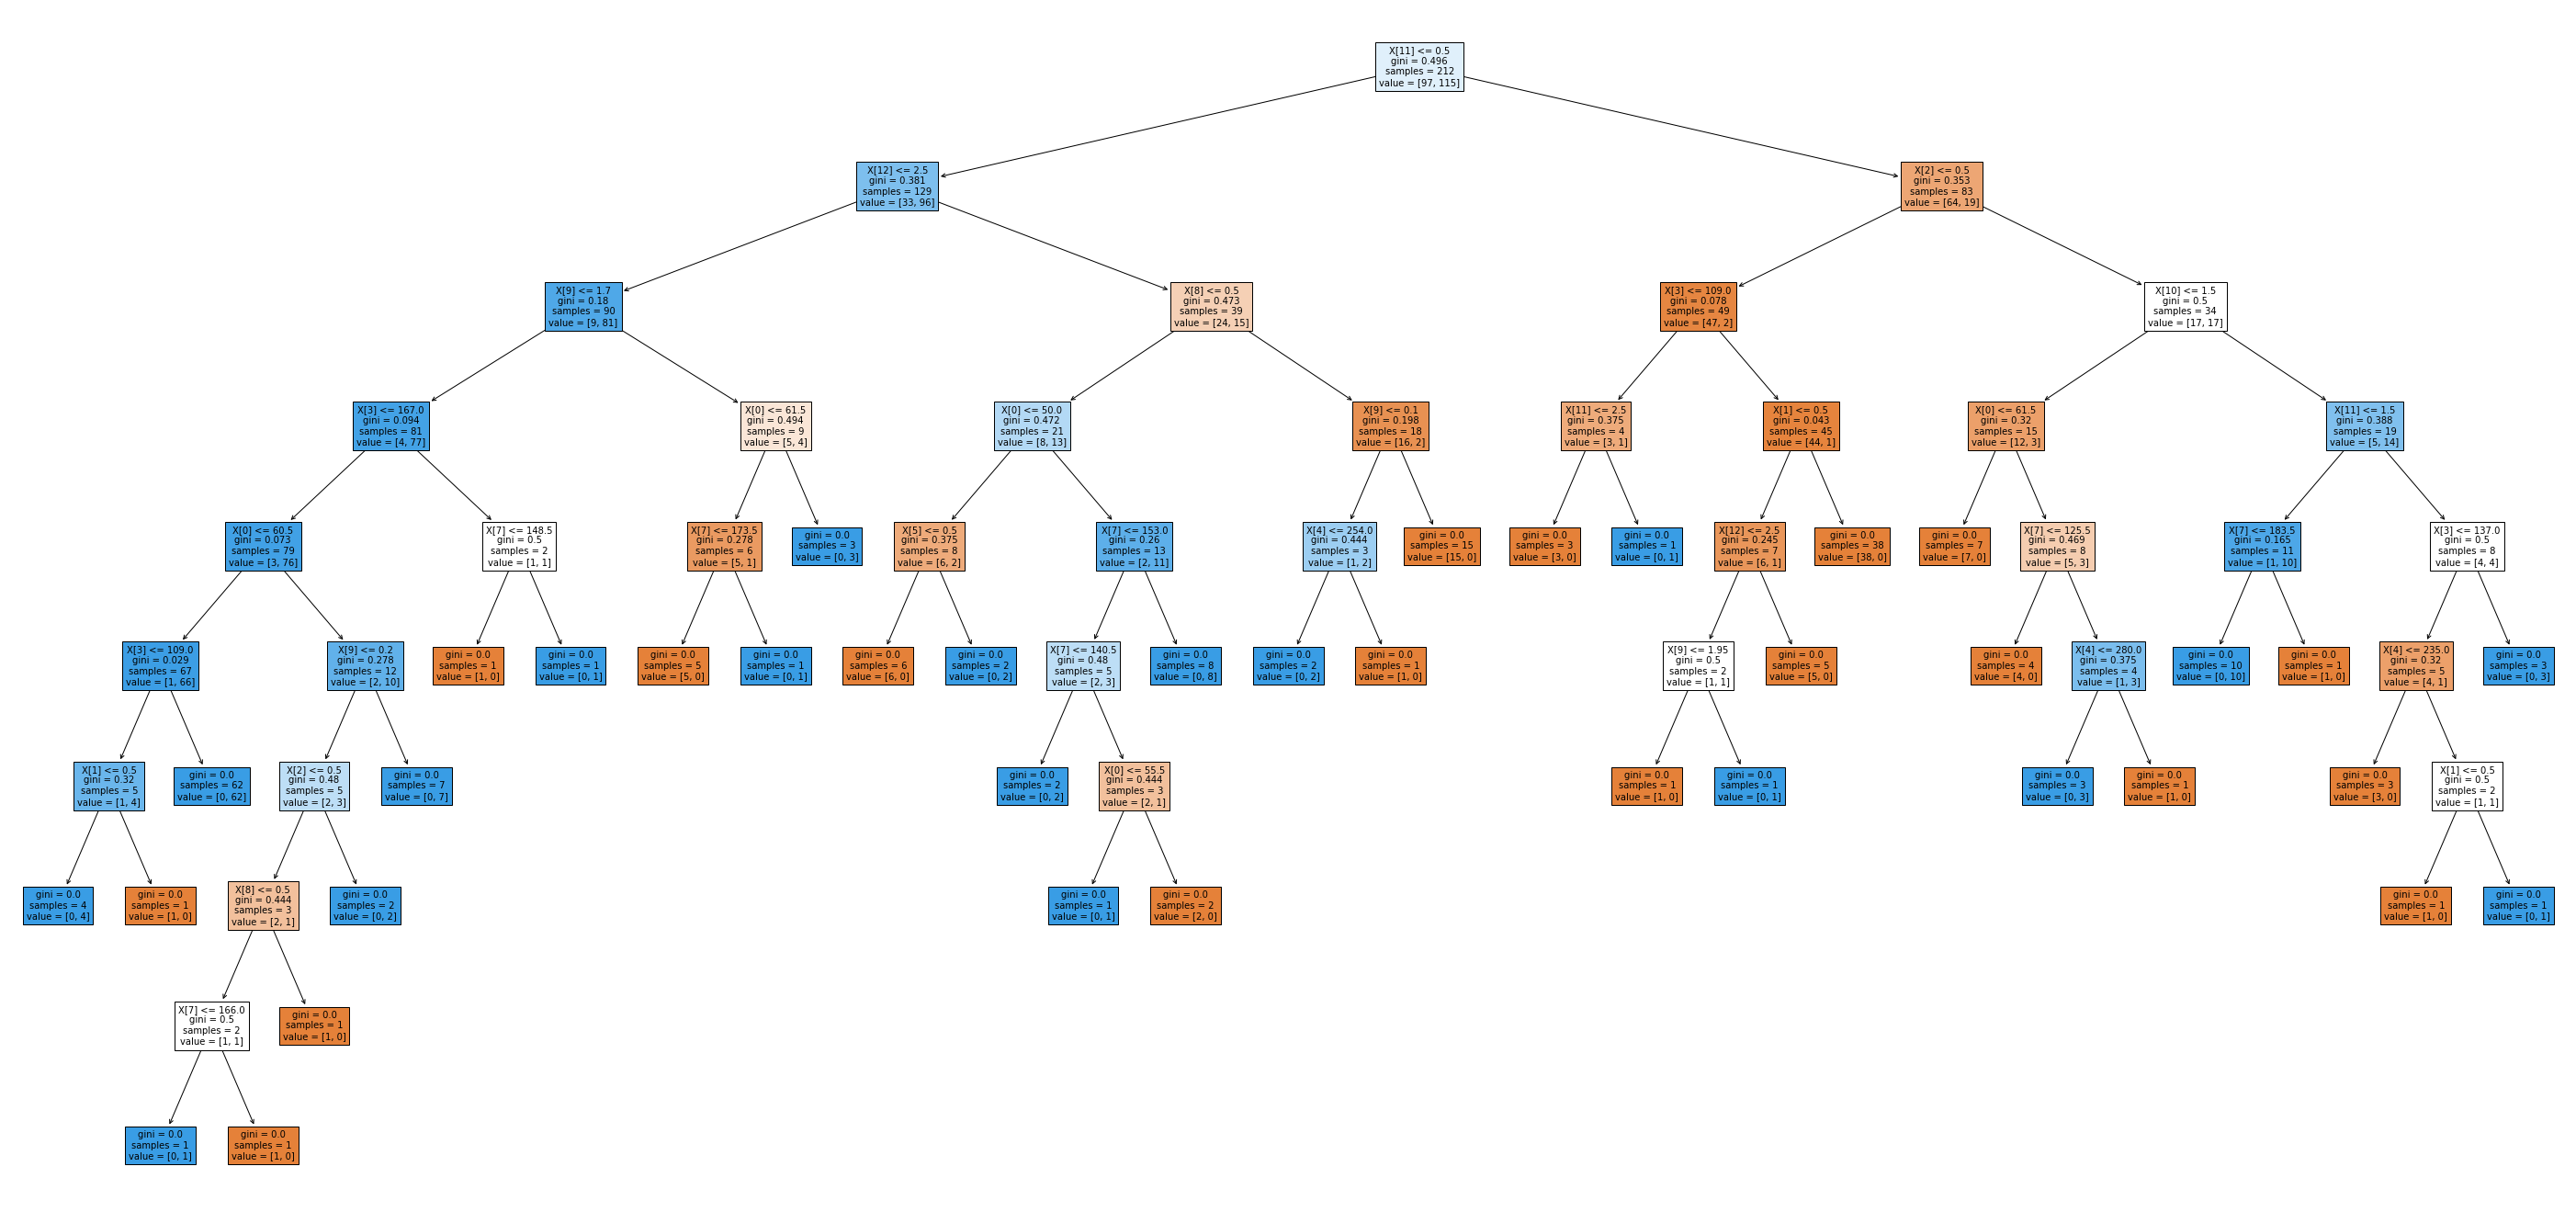

In [ ]:
fig, ax = plt.subplots(figsize=(50,24))
tree.plot_tree(clf2,filled=True,fontsize=10)
plt.savefig('decision_tree',dpi=100)
plt.show()

THUẬT TOÁN NAIVE BAYES

In [ ]:
gnb = GaussianNB()
bayes_pred = gnb.fit(x_train,y_train).predict(x_test)

In [ ]:
bayes_score = metrics.accuracy_score(y_test,bayes_pred)
print("Accuracy:",bayes_score)
print("Report:",metrics.classification_report(y_test,bayes_pred))

Accuracy: 0.8351648351648352
Report:               precision    recall  f1-score   support

           0       0.78      0.88      0.83        41
           1       0.89      0.80      0.84        50

    accuracy                           0.84        91
   macro avg       0.84      0.84      0.83        91
weighted avg       0.84      0.84      0.84        91



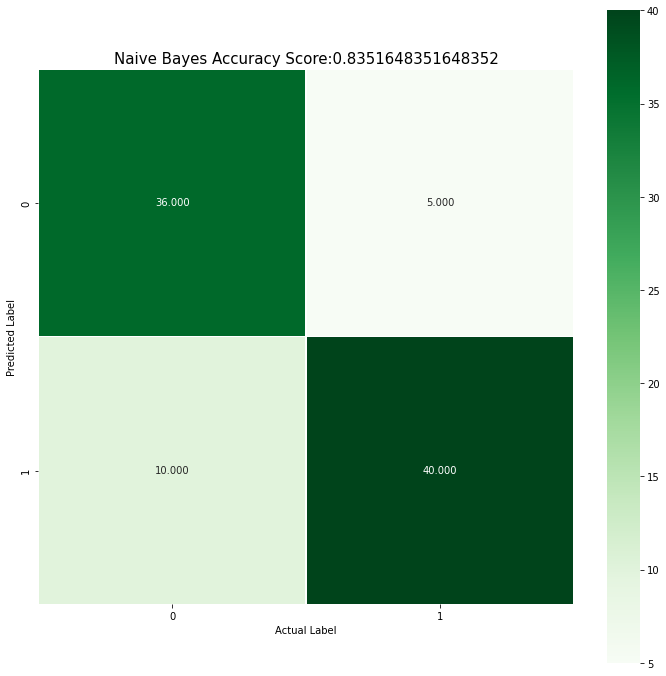

In [ ]:
bayes_cm = metrics.confusion_matrix(y_test,bayes_pred)

plt.figure(figsize=(12,12))
sns.heatmap(bayes_cm,annot=True, fmt=".3f",linewidth=.5,square=True,cmap='Greens');
plt.xlabel('Actual Label');
plt.ylabel('Predicted Label');
title ='Naive Bayes Accuracy Score:{0}'.format(bayes_score)
plt.title(title,size=15);

**KẾT LUẬN:**
Kết quả độ chính xác của thuật toán Naive Bayes là 0.835, ID3 là 0.725, CART là 0.725. Vậy độ chính xác của thuật toán Naive Bayes là cao nhất, vậy sử dụng Naive Bayes cho mô hình này là tốt nhất.